<a href="https://colab.research.google.com/github/megnaanand/climate-change-analysis/blob/main/climate_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [134]:
import pandas as pd
import matplotlib.pyplot as plt

In [135]:
%cd climate-change-analysis

[Errno 2] No such file or directory: 'climate-change-analysis'
/content/climate-change-analysis


## 1. Introduction

This data exploration and inference project aims to uncover correlations between environmental changes and a global rise in temperatures over the years 1880 to 2020, utilizing datasets provided by NASA Climate Change.

## 2. Data Collection and Preprocessing
 We will be using  information about global Carbon Dioxide and Methane levels, Global Temperature, Ocean Warming, Ice Sheets Sea Levels, and Arctic Sea Ice levels.


### 2.1. Data Collection


In [165]:
df_ice_sheets = pd.read_csv("data/ice_sheets.txt", delim_whitespace=True)
df_c02_levels = pd.read_csv("data/c02_levels.txt", delim_whitespace=True)
df_methane = pd.read_csv("data/methane.txt", delim_whitespace=True)
df_sea_levels = pd.read_csv("data/sea_levels.txt", delim_whitespace=True)
df_ocean_warming = pd.read_json("data/ocean_warming.json", orient='index')
df_arctic_sea_ice = pd.read_excel("data/arctic_sea_ice.xlsx", index_col=0)
df_global_temperatures = pd.read_csv("data/global_temperatures.txt", delim_whitespace=True)

### 2.2. Data Preprocessing


In [166]:
df_ice_sheets['TIME(year.decimal)'] = df_ice_sheets['TIME(year.decimal)'].astype(int)
df_ice_sheets = df_ice_sheets.groupby('TIME(year.decimal)').mean().reset_index()
df_ice_sheets = df_ice_sheets.rename(columns={'TIME(year.decimal)': 'Year'})
df_ice_sheets = df_ice_sheets.rename(columns={'TIME(year.decimal)': 'Year', 'Antarctic-mass(Gigatonnes)': 'Antarctic Ice Mass Lost Since 2002 (GT)', 'Antarctic-mass-1-sigma-uncertainty(Gigatonnes)': 'Antarctic Ice Mass Loss Uncertainty (STD 1, GT)'})
df_ice_sheets.head()

,Year,Antarctic Ice Mass Lost Since 2002 (GT),"Antarctic Ice Mass Loss Uncertainty (STD 1, GT)"
0,2002,-7.431429,91.620000
1,2003,-114.470000,44.167273
2,2004,-260.975000,37.161667
3,2005,-227.801667,34.594167
4,2006,-129.412500,36.380000


In [167]:
df_c02_levels = df_c02_levels.groupby('date').mean().reset_index()
df_c02_levels = df_c02_levels.drop(['month', 'decimal-date', 'days', 'st-dev-days', 'unc-of-mon-mean'], axis=1)
df_c02_levels = df_c02_levels.rename(columns={'date': 'Year', 'monthly-avg': 'CO2 Average Level (PPM)', 'de-season-alized': 'CO2 Average Level De-Seasonalized (PPM)'})
df_c02_levels.head()

,Year,CO2 Average Level (PPM),CO2 Average Level De-Seasonalized (PPM)
0,1958,315.232000,315.292000
1,1959,315.980833,315.977500
2,1960,316.910000,316.907500
3,1961,317.644167,317.640833
4,1962,318.454167,318.448333


In [168]:
df_global_temperatures = df_global_temperatures.rename(columns={'No_Smoothing': 'Raw Global Temperature Anomaly (C)', 'Lowess(5)':'Smoothed Global Temperature Anomaly (C)'})
df_global_temperatures.head()

,Year,Raw Global Temperature Anomaly (C),Smoothed Global Temperature Anomaly (C)
0,1880,-0.17,-0.10
1,1881,-0.09,-0.13
2,1882,-0.11,-0.17
3,1883,-0.18,-0.21
4,1884,-0.29,-0.24


In [169]:
df_methane = df_methane.rename(columns={'year': 'Year', 'mean': 'Average Methane Level (PPB)', 'unc':'Methane Level Uncertainty (1 STD, PPB)'})
df_methane.head()

,Year,Average Methane Level (PPB),"Methane Level Uncertainty (1 STD, PPB)"
0,1984,1644.85,0.67
1,1985,1657.29,0.59
2,1986,1670.09,0.74
3,1987,1682.70,0.49
4,1988,1693.16,0.67


This section takes relevant columns for the Global Mean Sea Levels and organizes it by year. GIA is Glacial Isostatic Adjustment (GIA), or the slow rising or sinking of land once burdened by ice sheets or glaciers. "No GIA" means this data does not account for these land level changes, and "GIA" means it does.

In [170]:
df_sea_levels['year_fraction_of_year'] = df_sea_levels['year_fraction_of_year'].astype(int)
df_sea_levels = df_sea_levels.groupby('year_fraction_of_year').mean().reset_index()
df_sea_levels = df_sea_levels.drop(['altimeter_type', 'merged_file_cycle_#', 'number_of_observations', 'number_weighted_observations'], axis=1)
rename_columns = {
    'year_fraction_of_year': 'Year',
    'GMSL_no_GIA_mm': 'Global Mean Sea Level (mm, No GIA)',
    'standard_deviation_GMSL_no_GIA_mm': 'Standard Deviation of GMSL (mm, No GIA)',
    'smoothed_GMSL_no_GIA': 'Smoothed GMSL (No GIA)',
    'GMSL_GIA_mm': 'Global Mean Sea Level (mm, With GIA)',
    'standard_deviation_GMSL_GIA_mm': 'Standard Deviation of GMSL (mm, With GIA)',
    'smoothed_GMSL_GIA_mm': 'Smoothed GMSL (With GIA)',
    'smoothed_GMSL_GIA_annual_semi_removed_mm': 'Smoothed GMSL Annual/Semi-Annual Removed (mm, With GIA)',
    'smoothed_GMSL_no_GIA_annual_semi_removed_mm': 'Smoothed GMSL Annual/Semi-Annual Removed (mm, No GIA)'
}
df_sea_levels.rename(columns=rename_columns, inplace=True)
df_sea_levels.head()

,Year,"Global Mean Sea Level (mm, No GIA)","Standard Deviation of GMSL (mm, No GIA)",Smoothed GMSL (No GIA),"Global Mean Sea Level (mm, With GIA)","Standard Deviation of GMSL (mm, With GIA)",Smoothed GMSL (With GIA),"Smoothed GMSL Annual/Semi-Annual Removed (mm, With GIA)","Smoothed GMSL Annual/Semi-Annual Removed (mm, No GIA)"
0,1993,-34.625676,87.608919,-34.650000,-34.504054,87.612432,-34.528108,-34.528108,-34.649459
1,1994,-30.970270,87.426216,-30.918649,-30.604054,87.432162,-30.552432,-30.551892,-30.918108
2,1995,-28.662973,85.356757,-27.987027,-28.038108,85.357297,-27.376486,-27.375405,-27.986216
3,1996,-26.613611,84.227222,-26.158056,-25.761111,84.221944,-25.305556,-25.304722,-26.157222
4,1997,-22.696216,98.027027,-22.361622,-21.605946,98.040541,-21.270811,-21.271622,-22.363514


In [171]:
df_ocean_warming.reset_index(inplace=True)
df_ocean_warming.columns = ['Year', 'Data']
df_ocean_warming['Year'] = pd.to_datetime(df_ocean_warming['Year']).dt.year
df_ocean_warming['Year'] = df_ocean_warming['Year'].astype(int)
df_ocean_warming = df_ocean_warming.groupby('Year').mean().reset_index()
df_ocean_warming = df_ocean_warming.rename(columns={'Data': 'Ocean Warming (ZJ)'})
df_ocean_warming.head()

,Year,Ocean Warming (ZJ)
0,1992,-10.881634
1,1993,-13.388852
2,1994,-2.664185
3,1995,5.064039
4,1996,15.332920


In [172]:
df_arctic_sea_ice = df_arctic_sea_ice.drop(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], axis=1)
df_arctic_sea_ice = df_arctic_sea_ice.rename(columns={'Annual': 'Arctic Sea Ice Extent (Millions of KM^2)'})
df_arctic_sea_ice.head()

,Arctic Sea Ice Extent (Millions of KM^2)
Year,
1978,12.673
1979,12.328
1980,12.337
1981,12.127
1982,12.447


### 2.3. Data Integration
Combine different datasets into a cohesive format.


In [173]:
merged_df = pd.merge(df_ice_sheets, df_global_temperatures, on='Year', how='outer')
merged_df = pd.merge(merged_df, df_methane, on='Year', how='outer')
merged_df = pd.merge(merged_df, df_sea_levels, on='Year', how='outer')
merged_df = pd.merge(merged_df, df_ocean_warming, on='Year', how='outer')
merged_df = pd.merge(merged_df, df_arctic_sea_ice, on='Year', how='outer')
merged_df = merged_df.sort_values(by='Year')

In [174]:
pd.set_option('display.max_columns', None)
print(merged_df.shape)
merged_df.head()

(144, 17)


,Year,Antarctic Ice Mass Lost Since 2002 (GT),"Antarctic Ice Mass Loss Uncertainty (STD 1, GT)",Raw Global Temperature Anomaly (C),Smoothed Global Temperature Anomaly (C),Average Methane Level (PPB),"Methane Level Uncertainty (1 STD, PPB)","Global Mean Sea Level (mm, No GIA)","Standard Deviation of GMSL (mm, No GIA)",Smoothed GMSL (No GIA),"Global Mean Sea Level (mm, With GIA)","Standard Deviation of GMSL (mm, With GIA)",Smoothed GMSL (With GIA),"Smoothed GMSL Annual/Semi-Annual Removed (mm, With GIA)","Smoothed GMSL Annual/Semi-Annual Removed (mm, No GIA)",Ocean Warming (ZJ),Arctic Sea Ice Extent (Millions of KM^2)
22,1880,NaN,NaN,-0.17,-0.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,1881,NaN,NaN,-0.09,-0.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,1882,NaN,NaN,-0.11,-0.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,1883,NaN,NaN,-0.18,-0.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,1884,NaN,NaN,-0.29,-0.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2.4 Data Cleaning/Adjusting Data

This dataframe only contains years of data in which all of the features are present.

In [175]:
merged_df_no_nan = merged_df.dropna()
print(merged_df_no_nan.shape)
merged_df_no_nan.head()

(18, 17)


,Year,Antarctic Ice Mass Lost Since 2002 (GT),"Antarctic Ice Mass Loss Uncertainty (STD 1, GT)",Raw Global Temperature Anomaly (C),Smoothed Global Temperature Anomaly (C),Average Methane Level (PPB),"Methane Level Uncertainty (1 STD, PPB)","Global Mean Sea Level (mm, No GIA)","Standard Deviation of GMSL (mm, No GIA)",Smoothed GMSL (No GIA),"Global Mean Sea Level (mm, With GIA)","Standard Deviation of GMSL (mm, With GIA)",Smoothed GMSL (With GIA),"Smoothed GMSL Annual/Semi-Annual Removed (mm, With GIA)","Smoothed GMSL Annual/Semi-Annual Removed (mm, No GIA)",Ocean Warming (ZJ),Arctic Sea Ice Extent (Millions of KM^2)
0,2002,-7.431429,91.620000,0.62,0.54,1772.66,0.55,-9.380000,85.393056,-9.390556e+00,-7.065833,85.449444,-7.076667,-7.076111,-9.390278,63.085198,11.363
1,2003,-114.470000,44.167273,0.62,0.58,1777.33,0.50,-6.321622,86.547297,-6.264324e+00,-3.766757,86.612703,-3.708919,-3.710270,-6.265135,69.738707,11.397
2,2004,-260.975000,37.161667,0.53,0.60,1777.05,0.50,-4.430270,85.545135,-4.550811e+00,-1.627568,85.564865,-1.749189,-1.749189,-4.551081,76.696781,11.240
3,2005,-227.801667,34.594167,0.67,0.61,1774.16,0.64,-0.030811,84.578108,-6.001206e-18,3.014054,84.549730,3.044595,3.044054,0.000000,79.527011,10.907
4,2006,-129.412500,36.380000,0.63,0.62,1774.95,0.56,1.093889,85.335833,1.115833e+00,4.375000,85.337222,4.396944,4.507778,1.227222,84.202106,10.773


This dataframe only considers the averages of each features. In most cases the smoothed average was taken if provided.

In [176]:
averages_df = merged_df.dropna()
### NEED TO COMPLETE ###

## 3. Exploratory Data Analysis (EDA)

### 3.1. Initial Data Exploration
Use basic statistics and visualizations to understand the datasets.

#### 3.1.1. Analysis on Antarctic Ice Mass Loss

This data measures the amount of ice mass the Antarctic has lost in gigatonnes since 2002.

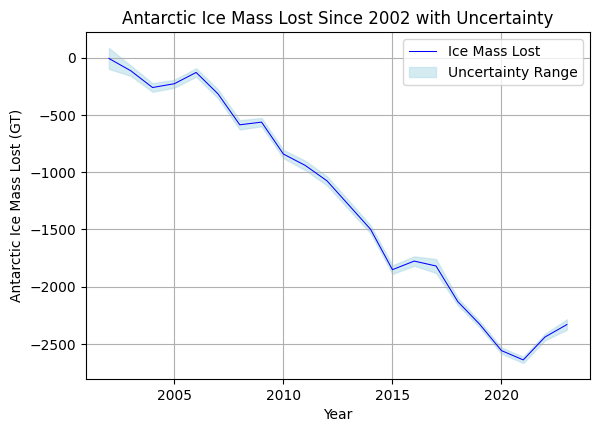

In [177]:
plt.figure(figsize=(6.5, 4.5))
plt.plot(df_ice_sheets['Year'], df_ice_sheets['Antarctic Ice Mass Lost Since 2002 (GT)'], label='Ice Mass Lost', color='blue', linewidth=0.75)
plt.fill_between(df_ice_sheets['Year'],
                 df_ice_sheets['Antarctic Ice Mass Lost Since 2002 (GT)'] - df_ice_sheets['Antarctic Ice Mass Loss Uncertainty (STD 1, GT)'],
                 df_ice_sheets['Antarctic Ice Mass Lost Since 2002 (GT)'] + df_ice_sheets['Antarctic Ice Mass Loss Uncertainty (STD 1, GT)'],
                 color='lightblue', alpha=0.5, label='Uncertainty Range')
plt.title('Antarctic Ice Mass Lost Since 2002 with Uncertainty')
plt.xlabel('Year')
plt.ylabel('Antarctic Ice Mass Lost (GT)')
plt.legend()
plt.grid(True)
plt.show()

Plotting the average ice mass lost in the Antarctic with the uncertainty behind it, we can see that there has been a negative correlation between ice lost and the year, indicating that as time passes, we have lost more and more antarctic ice.

#### 3.1.2 Analysis on Global Temperature Anomaly

The global temperature anomaly measures the change in global surface temperature compared to the long-term average from 1951 to 1980.

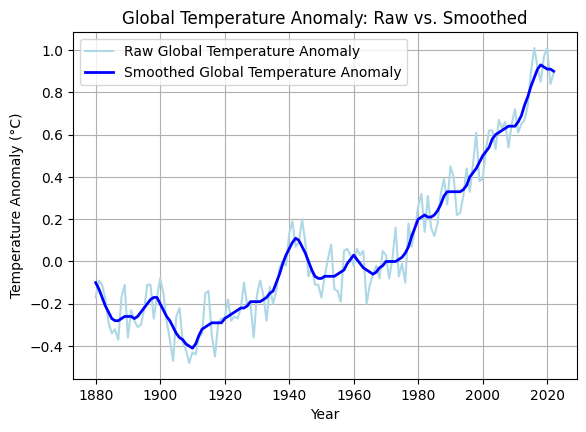

In [178]:
plt.figure(figsize=(6.5, 4.5))
plt.plot(df_global_temperatures['Year'], df_global_temperatures['Raw Global Temperature Anomaly (C)'], label='Raw Global Temperature Anomaly', color='lightblue')
plt.plot(df_global_temperatures['Year'], df_global_temperatures['Smoothed Global Temperature Anomaly (C)'], label='Smoothed Global Temperature Anomaly', color='blue', linewidth=2)
plt.title('Global Temperature Anomaly: Raw vs. Smoothed')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.legend()
plt.grid(True)
plt.show()

Plotting the smoothed global temperature anomaly, we can see the general trend of the temperature anomaly that the raw data shows as well. This shows a clear positive correlation between year and the temperature anomaly, indicating the temperatures have departed significantly from the average in the 1950s-1980s over time.

#### 3.1.3 Analysis on Carbon Dioxide Levels

This data measures the average CO2 levels since 1958 in parts per million.

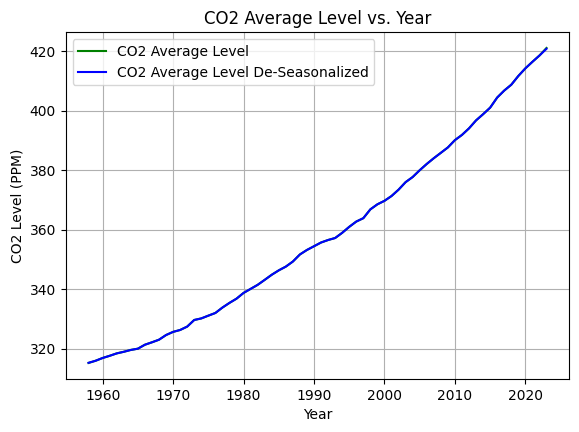

In [179]:
plt.figure(figsize=(6.5, 4.5))
plt.plot(df_c02_levels['Year'], df_c02_levels['CO2 Average Level (PPM)'], label='CO2 Average Level', color='green')
plt.plot(df_c02_levels['Year'], df_c02_levels['CO2 Average Level De-Seasonalized (PPM)'], label='CO2 Average Level De-Seasonalized', color='blue')
plt.title('CO2 Average Level vs. Year')
plt.xlabel('Year')
plt.ylabel('CO2 Level (PPM)')
plt.legend()
plt.grid(True)
plt.show()

Here, we can see a clear positive correlation between the year and the CO2 levels, indicating that as time has gone by, carbon dioxide levels have increased.

#### 3.1.3 Analysis on Average Methane Levels

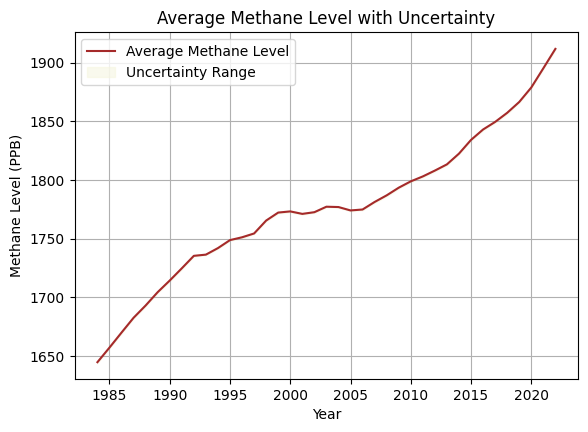

In [180]:
plt.figure(figsize=(6.5, 4.5))
plt.plot(df_methane['Year'], df_methane['Average Methane Level (PPB)'], label='Average Methane Level', color='brown')
plt.fill_between(df_methane['Year'],
                 df_methane['Average Methane Level (PPB)'] - df_methane['Methane Level Uncertainty (1 STD, PPB)'],
                 df_methane['Average Methane Level (PPB)'] + df_methane['Methane Level Uncertainty (1 STD, PPB)'],
                 color='beige', alpha=0.5, label='Uncertainty Range')
plt.title('Average Methane Level with Uncertainty')
plt.xlabel('Year')
plt.ylabel('Methane Level (PPB)')
plt.legend()
plt.grid(True)
plt.show()

#### 3.1.4 Analysis on Global Mean Sea Level

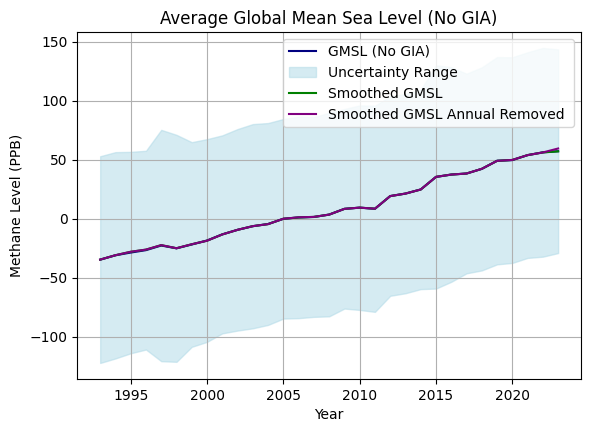

In [189]:
plt.figure(figsize=(6.5, 4.5))
plt.plot(df_sea_levels['Year'], df_sea_levels['Global Mean Sea Level (mm, No GIA)'], label='GMSL (No GIA)', color='navy')
plt.fill_between(df_sea_levels['Year'],
                 df_sea_levels['Global Mean Sea Level (mm, No GIA)'] - df_sea_levels['Standard Deviation of GMSL (mm, No GIA)'],
                 df_sea_levels['Global Mean Sea Level (mm, No GIA)'] + df_sea_levels['Standard Deviation of GMSL (mm, No GIA)'],
                 color='lightblue', alpha=0.5, label='Uncertainty Range')
plt.plot(df_sea_levels['Year'], df_sea_levels['Smoothed GMSL (No GIA)'], label = 'Smoothed GMSL', color = 'green')
plt.plot(df_sea_levels['Year'], df_sea_levels['Smoothed GMSL Annual/Semi-Annual Removed (mm, No GIA)'], label = 'Smoothed GMSL Annual Removed ', color = 'purple')
plt.title('Average Global Mean Sea Level (No GIA)')
plt.xlabel('Year')
plt.ylabel('Methane Level (PPB)')
plt.legend()
plt.grid(True)
plt.show()

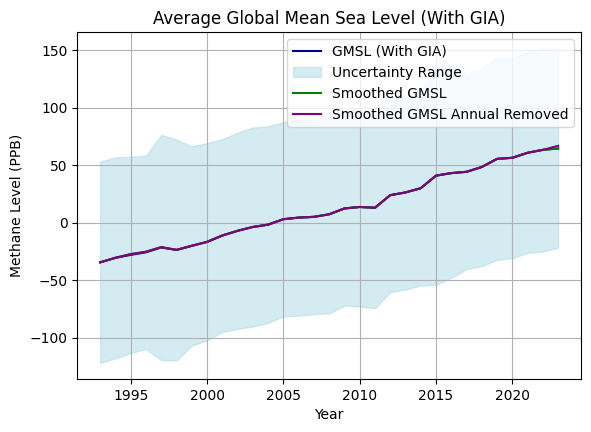

In [190]:
plt.figure(figsize=(6.5, 4.5))
plt.plot(df_sea_levels['Year'], df_sea_levels['Global Mean Sea Level (mm, With GIA)'], label='GMSL (With GIA)', color='navy')
plt.fill_between(df_sea_levels['Year'],
                 df_sea_levels['Global Mean Sea Level (mm, With GIA)'] - df_sea_levels['Standard Deviation of GMSL (mm, With GIA)'],
                 df_sea_levels['Global Mean Sea Level (mm, With GIA)'] + df_sea_levels['Standard Deviation of GMSL (mm, With GIA)'],
                 color='lightblue', alpha=0.5, label='Uncertainty Range')
plt.plot(df_sea_levels['Year'], df_sea_levels['Smoothed GMSL (With GIA)'], label = 'Smoothed GMSL', color = 'green')
plt.plot(df_sea_levels['Year'], df_sea_levels['Smoothed GMSL Annual/Semi-Annual Removed (mm, With GIA)'], label = 'Smoothed GMSL Annual Removed', color = 'purple')
plt.title('Average Global Mean Sea Level (With GIA)')
plt.xlabel('Year')
plt.ylabel('Methane Level (PPB)')
plt.legend()
plt.grid(True)
plt.show()

#### 3.1.5 Analysis on Ocean Warming

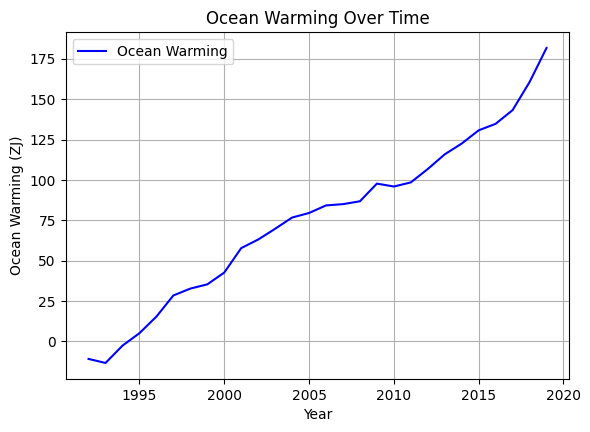

In [192]:
plt.figure(figsize=(6.5, 4.5))
plt.plot(df_ocean_warming['Year'], df_ocean_warming['Ocean Warming (ZJ)'], label='Ocean Warming', color='blue')
plt.title('Ocean Warming Over Time')
plt.xlabel('Year')
plt.ylabel('Ocean Warming (ZJ)')
plt.legend()
plt.grid(True)
plt.show()

#### 3.1.6 Analysis on Arctic Sea Ice Extent

### 3.2. Correlation Analysis

#### 3.2.1. Heatmaps
Visualize correlations between different environmental indicators.

#### 3.2.2. Geographic Heatmaps
Show spatial distribution of climate change indicators.

### 3.3. Time Series Analysis

#### 3.3.1. Line Plots
Examine trends in temperature and other variables over time.

#### 3.3.2. Seasonal Analysis
Investigate seasonal patterns in the data.

## 4. Data Visualization and Inference

### 4.1. Advanced Data Visualization

#### 4.1.1. Interactive Plots
Create dynamic plots for more engaging data exploration.

#### 4.1.2. Comparative Visualizations
Compare different indicators side-by-side

### 4.2. Inference from Visualizations
Draw conclusions from the visualizations created.

## 5. Predictive Modeling

### 5.1. Model Selection
Discuss the selection of predictive models

### 5.2. Model Training and Validation
Train models on historical data and validate their performance.

### 5.3. Forecasting
Use the models to forecast future climate trends based on historical data.

## 6. Conclusion